In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import linear_regression
from sklearn.linear_model import LinearRegression as sklearn_LR
%matplotlib inline

ImportError: cannot import name 'linear_regression' from 'linear_regression' (C:\Users\User\anaconda3\lib\site-packages\linear_regression\__init__.py)

1.У вас, с прошлого урока, имеются реализации расчёта среднеквадратичной ошибки и её градиента для линейнй регрессии с коэффициентами при факторах(w) и свободным коэффициентам.
В этом задании вы должны модифицировать реализацию рассчёта среднеквадратичной ошибки и рассчёта её производной, так, чтобы с к среднеквадратичной ошибке добавлялась l2 регулярязационная поправка: $ +c*\sum \limits _{j}  w_{j}^2 $ а к градиенту- ссответствующее выражение для градиента регулярязационной поправки.

In [6]:
class linear_regression:
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0+self.c*np.sum(self.w**2)
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0]+2*self.c*self.w, np.sum(2*delta)/y_real.shape[0]

2.На основе этих функций создайте свою регуляризированную полиномиальную регрессию и опробуйте на одном из примеров построения полиномиальной модели из этого урока.
Пояснение:Для этого Вам достаточно создать класс, который наследуется от класса polynomial_regression из данного урока, и переопределить в нём методы mserror, mserror_grad(под переопределением подразумевается создание на новом классе методов с таким же названием).

In [6]:
import pandas as pd

In [7]:
#чтение датасета
data=pd.read_csv('datasets5.csv')
data=data.iloc[1:,:]
data

,x,y
1,0.025183,-10.149463
2,0.050366,-7.517911
3,0.075549,-5.480920
4,0.100732,-5.882184
5,0.125916,-3.672119
...,...,...
495,12.465638,7.887764
496,12.490821,7.991471
497,12.516004,8.313358
498,12.541188,9.128511


In [8]:

x_data = data['x']
f_data = data['y']

In [85]:
from scipy.optimize import minimize
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
    def _optimize(self, X, Y):
            def assign_w(w):
                self.w0=w[0]
                self.w=w[1:][np.newaxis, :]
            def func(w):
                assign_w(w)
                return super(polynomial_regression, self).test(X, Y)
            def jac(w):
                assign_w(w)
                gr_w, gr_w0=self._mserror_grad(X,Y)
                return np.concatenate([[gr_w0], gr_w.flatten()])
            w=np.zeros((X.shape[1]+1,))
            w=minimize(func, w, jac=jac, method= 'BFGS').x
            assign_w(w)
       
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)
    

In [86]:
class polynomial_regression(linear_regression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power)).flatten()
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y)

In [87]:
class polynomial_regression_l2(polynomial_regression):
    def __init__(self, max_power, c=1.0):
        self.max_power=max_power
        self.c=c
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0+self.c*np.sum(self.w**2)
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0]+2*self.c*self.w, np.sum(2*delta)/y_real.shape[0]
    

In [88]:
#Построение полиномиальной регресси при ощи созданного нами класса
mod2=polynomial_regression_l2(9)
mod2.fit(x_data, f_data)
y_poly=mod2.predict(x_data)
y_poly

<ipython-input-86-68dfd0937e02>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x=x[:, np.newaxis]
<ipython-input-85-89f03ff6679e>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y=Y[:, np.newaxis]
<ipython-input-86-68dfd0937e02>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x=x[:, np.newaxis]


array([ 0.64228035,  0.65346526,  0.66522944,  0.67758487,  0.6905411 ,
        0.70410543,  0.71828297,  0.73307683,  0.74848822,  0.76451654,
        0.78115955,  0.79841345,  0.81627298,  0.83473156,  0.85378135,
        0.87341335,  0.89361752,  0.91438287,  0.93569749,  0.95754871,
        0.97992311,  1.00280664,  1.02618469,  1.05004213,  1.07436339,
        1.09913256,  1.12433339,  1.14994938,  1.17596384,  1.20235994,
        1.22912074,  1.25622926,  1.28366852,  1.31142157,  1.33947154,
        1.3678017 ,  1.39639545,  1.42523637,  1.45430829,  1.48359527,
        1.51308163,  1.54275202,  1.5725914 ,  1.60258508,  1.63271874,
        1.66297842,  1.69335061,  1.72382217,  1.75438043,  1.78501313,
        1.81570849,  1.84645518,  1.87724234,  1.90805959,  1.93889705,
        1.9697453 ,  2.00059543,  2.03143901,  2.06226812,  2.09307532,
        2.12385366,  2.1545967 ,  2.18529847,  2.21595349,  2.24655675,
        2.27710372,  2.30759035,  2.33801301,  2.36836858,  2.39

In [89]:
our_mod=polynomial_regression_l2(9)
our_mod.fit(x_data, f_data)
print('Коэффициенты при факторах(наша модель):', our_mod.w)
print('Нулевые коэффициенты(интерцепты):',our_mod.w0)

Коэффициенты при факторах(наша модель): [[ 4.10726582e-01  4.31803051e-01  1.94630790e-01 -2.96170414e-01
   1.25847333e-01 -2.61552412e-02  2.86930471e-03 -1.58900351e-04
   3.49624733e-06]]
Нулевые коэффициенты(интерцепты): 0.6316601408865943


<ipython-input-86-68dfd0937e02>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x=x[:, np.newaxis]
<ipython-input-85-89f03ff6679e>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y=Y[:, np.newaxis]


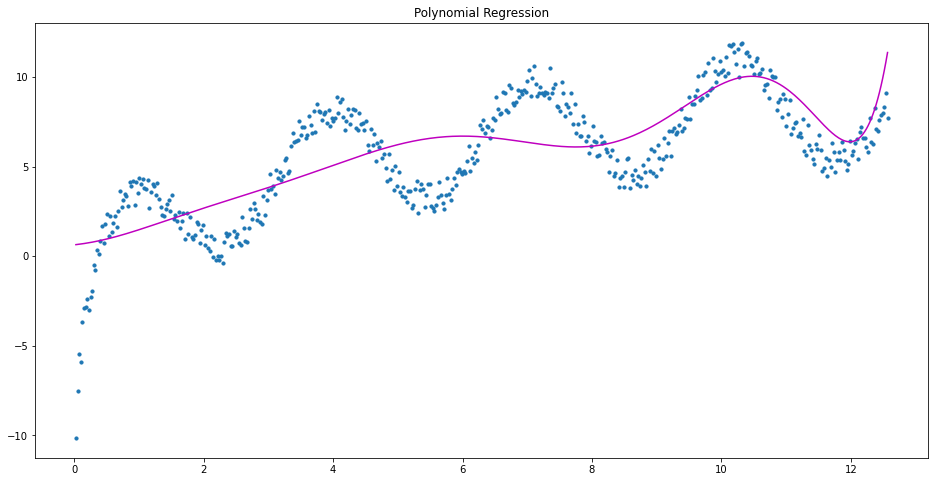

In [81]:
plt.figure(figsize = (16, 8))
plt.scatter(x_data, f_data, s=10)
plt.title('Polynomial Regression')
plt.plot(x_data, y_poly, color='m')
plt.show()

3*. (по желанию). Оцените оцените предсказательную способность реализованного метода с использование 5-ти ступенчатой кросс-валидации, показанной в примере выше.

In [82]:
#Посчитаем р-квадрат
def r_square(y, y_real):
    ss_total=np.sum((y_real-np.mean(y_real))**2)
    ss_res=np.sum((y_real-y)**2)
    return 1-ss_res/ss_total
print(r_square(model.predict(x_data), f_data))

0.5177373894347339


<ipython-input-7-68dfd0937e02>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x=x[:, np.newaxis]


In [83]:
indexes=np.arange(len(f_data))%5
y_actual=[]
y_predicted=[]

for i in range(5):
    y_actual.append(f_data[indexes==i])
    mod=polynomial_regression_l2(3)
    mod.fit(x_data[indexes!=i], f_data[indexes!=i])
    y_predicted.append(mod.predict(x_data[indexes==i]))
    
y_actual=np.concatenate(y_actual)
y_predicted=np.concatenate(y_predicted)
print(r_square(y_predicted, y_actual))

0.5165886926904292


<ipython-input-7-68dfd0937e02>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x=x[:, np.newaxis]
<ipython-input-6-89f03ff6679e>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y=Y[:, np.newaxis]
<ipython-input-7-68dfd0937e02>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x=x[:, np.newaxis]
<ipython-input-6-89f03ff6679e>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y=Y[:, np.newaxis]
<ipython-input-7-68dfd0937e02>:7: FutureWarning: S

In [84]:
np.sum((y_actual-np.mean(y_actual))**2)/len(y_actual)

10.423480292990307

решение_2

In [1]:
#импорт библиотек
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [2]:
#функция для расчета метрик
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [10]:
x = data.iloc[:, 0:1].values
y = data.iloc[:, 1:].values

In [18]:
#модель полиномиальной регресии
polynomial_features = PolynomialFeatures(degree=20)

x_poly = polynomial_features.fit_transform(x)


model = LinearRegression(normalize=True)
model.fit(x_poly,y)

y_poly = model.predict(x_poly)

#метрики
print('Set evaluation:\n_____________________________________')
print_evaluate(y, y_poly)


Set evaluation:
_____________________________________
MAE: 0.4762678024112833
MSE: 0.3114686715782839
RMSE: 0.5580937838556204
R2 Square 0.9701185532256684
__________________________________


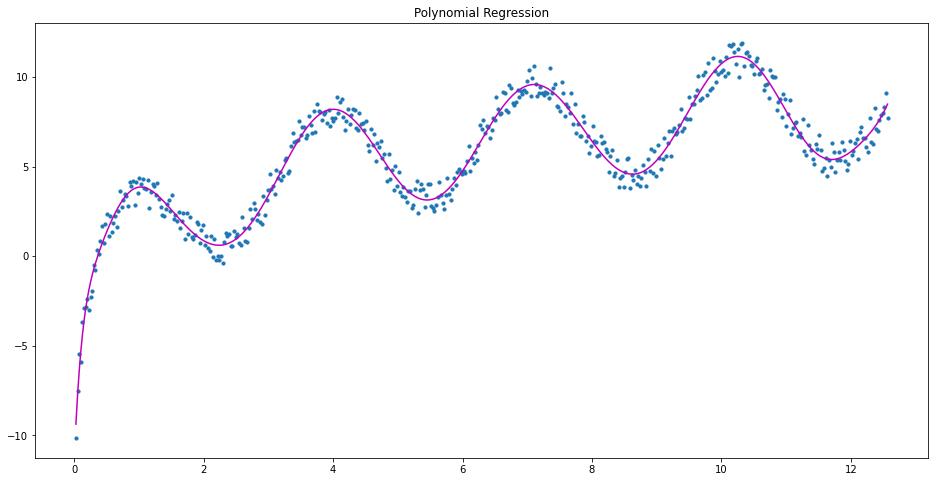

In [19]:
#визуализация
plt.figure(figsize = (16, 8))
plt.scatter(x, y, s=10)
plt.title('Polynomial Regression')
plt.plot(x, y_poly, color='m')
plt.show()